Modeling prior predictive distribution

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO:cmdstanpy:compiling stan file /home/model1_lab3.stan to exe file /home/model1_lab3
INFO:cmdstanpy:compiled model executable: /home/model1_lab3
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


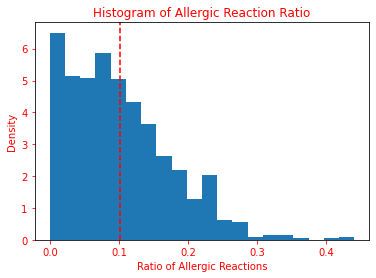

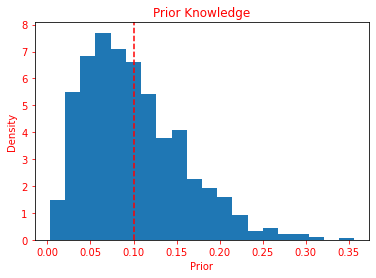

In [103]:
# Compile the Stan model
model = CmdStanModel(stan_file='home/model1_lab3.stan')

# Generate 1000 samples
samples = model.sample(
    fixed_param=True,
    iter_sampling=1000, 
    iter_warmup=0 
)
# Extract the samples for p and y
p_samples = samples.stan_variable('p')
y_samples = samples.stan_variable('y')

# Compute the ratio of allergic reactions for each sample
ratio_samples = y_samples / 50.0

# Compute the mean of the ratio samples
ratio_mean = np.mean(ratio_samples)

# Compute the mean of the p samples
p_mean = np.mean(p_samples)

# Create a histogram of the ratio samples
plt.hist(ratio_samples, bins=20, density=True)
plt.xlabel('Ratio of Allergic Reactions', color ='red')
plt.ylabel('Density', color ='red')
plt.title('Histogram of Allergic Reaction Ratio', color ='red')
plt.axvline(ratio_mean, color='r', linestyle='--', label='Mean')
plt.tick_params(axis='both', colors='red')
plt.show()

# Create a histogram of the prior samples
plt.hist(p_samples, bins=20, density=True)
plt.xlabel('Prior', color ='red')
plt.ylabel('Density', color ='red')
plt.title('Prior Knowledge', color ='red')
plt.axvline(p_mean, color='r', linestyle='--', label='Mean')
plt.tick_params(axis='both', colors='red')
plt.show()

By comparing the prior and ratio, we can assess whether the prior is a good representation of our prior knowledge. If the ratio dstribution is similar to the prior distribution, then our prior is likely appropriate and the mean of the ratio is consistent with our prior knowledge. 

Modeling posterior and posterior predictive distribution

INFO:cmdstanpy:compiling stan file /home/model2_lab3.stan to exe file /home/model2_lab3
INFO:cmdstanpy:compiled model executable: /home/model2_lab3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/model2_lab3.hpp /home/model2_lab3.stan
Warning in '/home/model2_lab3.stan', line 3, column 2: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_D


INFO:cmdstanpy:CmdStan done processing.



Ratio mean value =  0.6195
94% Density interval of ratio =  [0.48 0.74]
Ratio p value =  0.6142929999999999
94% Density interval of p =  [0.614293 0.614293]
count = 0
The probability that the predicted ratio is lower
 than the average probability from traditional vaccines is: 0.0


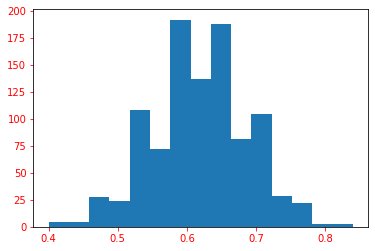

In [104]:
# Defined the data
N = 50
y = np.random.binomial(1, 0.5, N)

# Compiling and running the model with default settings
model2 = CmdStanModel(stan_file='home/model2_lab3.stan')
samples2 = model2.sample(data={'N': N, 'y': y},
                        fixed_param=True,
                        iter_sampling=1000, 
                        iter_warmup=0 )
df = samples2.draws_pd()
p2 = df['p']

# Computing ratio and density interval
ratio_samples2 = df['y_pred'] / N
ratio_interval = az.hdi(ratio_samples2.to_numpy(), credible_interval=0.94)
p2_interval = az.hdi(p2.to_numpy(), credible_interval=0.94)

# Create a histogram of the ratio
plt.hist(ratio_samples2, bins=15)
plt.tick_params(axis='both', colors='red')
plt.show

# compute expected value and 94% density interval of predicted ratio
print('Ratio mean value = ', ratio_samples2.mean())
print('94% Density interval of ratio = ', ratio_interval)

# compute expected value and 94% density interval of p
print('Ratio p value = ', p2.mean())
print('94% Density interval of p = ', p2_interval)

# Compute the average probability from traditional vaccines
p_avg = 0.2

# Compute the number of simulated ratios that are smaller than the average probability
count = np.sum(ratio_samples2 < p_avg)
print('count =',count)

# Compute the probability that the predicted ratio is lower than the average probability
prob = count / len(ratio_samples2)

print("The probability that the predicted ratio is lower\n than the average probability from traditional vaccines is:", prob)